In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
data_path = "data/data_complete.csv"
import pandas as pd

data = pd.read_csv(data_path)
data = data.iloc[:, 2:]
# data.corr()

In [4]:
import DataLoader, Machine_Model, Engine, Information
import torch
seed = 51

train_percent = 0.7
val_percent = 0.3
test_percent = None
batch_size = 100
torch.manual_seed(seed)
dataloader = DataLoader.MyDataloader(file_path=data_path, train_percent=train_percent, val_percent=val_percent,
                                     test_percent=test_percent, batch_size=batch_size)
train, val, test = dataloader.fit()

try:
    print(len(train), len(val), len(test))
except:
    print(len(train), len(val))


# INPUT_SIZE = len(Information.features)
INPUT_SIZE = 1
HIDDEN_UNITS = 18
OUTPUT_SIZE = 1
DEPTH = 4
torch.manual_seed(seed)
model0 = Machine_Model.LSTM_V0(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS, output_size=3, depth_number=DEPTH)
torch.manual_seed(seed)
model1 = Machine_Model.NN_V0(input_size=11, hidden_size=HIDDEN_UNITS, output_size=OUTPUT_SIZE)

EPOCHS = 1200
loss_fn = torch.nn.MSELoss()
learning_rate = 0.032
optimizer = torch.optim.Adam(model0.parameters(), learning_rate)
optimizer1 = torch.optim.Adam(model1.parameters(), learning_rate, weight_decay=0.0085)

torch.manual_seed(seed)
engine = Engine.Machine_Engine(model=model0, model1=model1, train_dataloader=train, val_dataloader=val,
                               test_dataloader=test)
torch.manual_seed(seed)
model0_results = engine.train(loss_fn=loss_fn, optimizer=optimizer, optimizer1=optimizer1, epochs_num=EPOCHS,
                              early_stop_patience=None, writer=False, resolution=1)



1 1


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch 1 | train: Loss 0.887081 Accuracy -31.5322 | validation: Loss 0.524243 Accuracy -31.9345
Epoch 2 | train: Loss 0.318526 Accuracy -10.6814 | validation: Loss 0.032558 Accuracy -1.0454
Epoch 3 | train: Loss 0.029851 Accuracy -0.0947 | validation: Loss 0.416571 Accuracy -25.1702
Epoch 4 | train: Loss 0.260220 Accuracy -8.5431 | validation: Loss 0.253963 Accuracy -14.9547
Epoch 5 | train: Loss 0.142691 Accuracy -4.2330 | validation: Loss 0.063672 Accuracy -3.0001
Epoch 6 | train: Loss 0.037892 Accuracy -0.3896 | validation: Loss 0.033923 Accuracy -1.1311
Epoch 7 | train: Loss 0.034178 Accuracy -0.2534 | validation: Loss 0.063465 Accuracy -2.9870
Epoch 8 | train: Loss 0.061843 Accuracy -1.2680 | validation: Loss 0.068976 Accuracy -3.3333
Epoch 9 | train: Loss 0.070924 Accuracy -1.6010 | validation: Loss 0.053731 Accuracy -2.3755
Epoch 10 | train: Loss 0.061100 Accuracy -1.2408 | validation: Loss 0.039300 Accuracy -1.4689
Epoch 11 | train: Loss 0.040849 Accuracy -0.4981 | validation: L

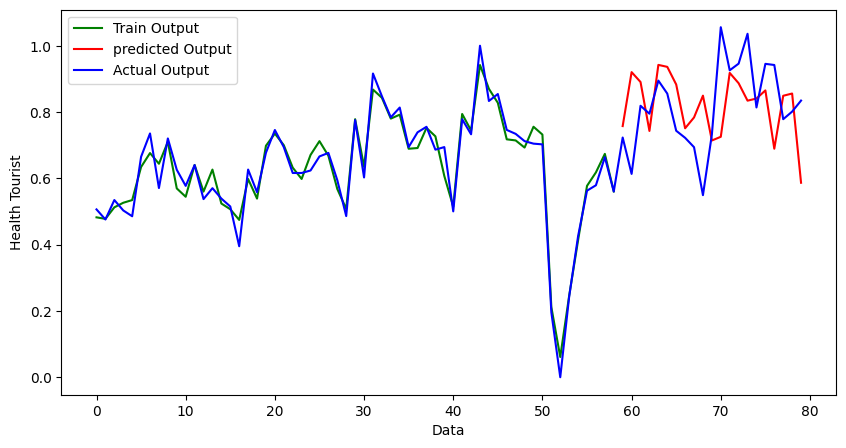

In [5]:
engine.plot_predict_real()

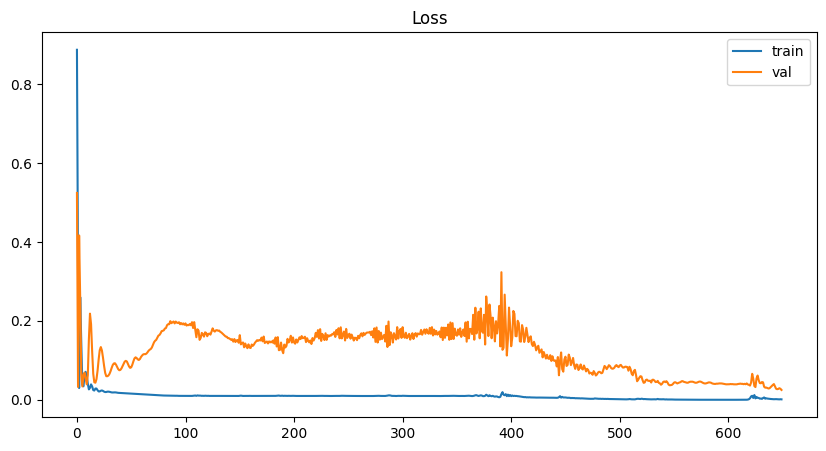

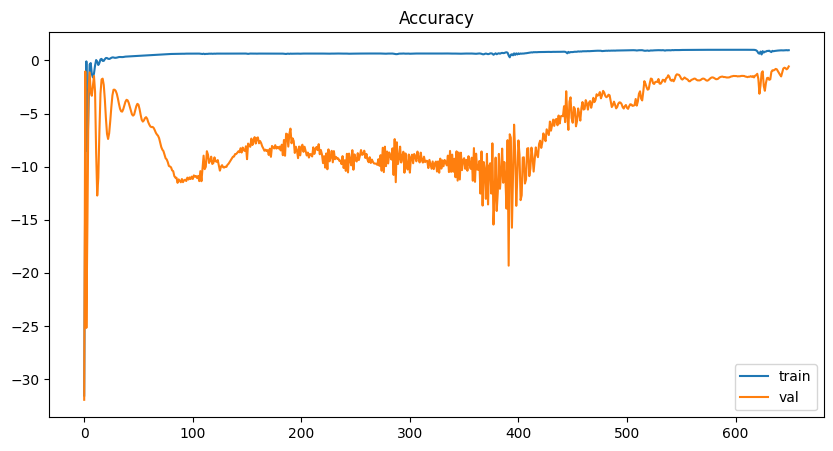

In [153]:
engine.plot_loss()
engine.plot_acc()

In [154]:
engine.save()

In [155]:
test_loss, test_acc, true_predict_list = engine.test(loss_fn=loss_fn)
test_acc

[!!!IMPORTANT NOTE!!!]
The test_function provided here is intended solely for the final model analysis and reporting purposes.
Please refrain from using it as a general-purpose function in your own projects. Always refer to
the appropriate train and validation data for developing and fine-tuning your own models.
[INFO] There is no test in your data


ValueError: 

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=runs

In [80]:
dd = dataloader.val_dataloader

In [81]:
for x, y in dd:
    x2, y2 = x, y

In [82]:
x2 = x2[-6, :, :]

In [83]:
dataloader.scaler_x.inverse_transform(x2)

array([[  2869.9999578 ,   5751.00000989,   5714.00015974,
        591907.98618531,   9468.00025457, 153304.00005625,
         51022.00059062,   3440.99993515,      0.        ],
       [  2780.00008225,   5751.00000989,   5714.00015974,
        591907.98618531,   9468.00025457, 153304.00005625,
         51022.00059062,   3440.99993515,      0.        ],
       [  2318.99996436,   4638.99992132,   4270.00006247,
        822596.98602057,   9487.00000024, 208977.00185978,
         47242.99985173,   2312.00004625,      0.        ],
       [  2901.00005841,   4638.99992132,   4270.00006247,
        822596.98602057,   9487.00000024, 208977.00185978,
         47242.99985173,   2312.00004625,      0.        ],
       [  3933.0000999 ,   4638.99992132,   4270.00006247,
        822596.98602057,   9487.00000024, 208977.00185978,
         47242.99985173,   2312.00004625,      0.        ],
       [  3518.99995077,   4638.99992132,   4270.00006247,
        822596.98602057,   9487.00000024, 208977.00

In [ ]:
import numpy as np
x3 = np.array([[2870, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
      [2780, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
      [2319, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
      [2901, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
      [3933, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0],
      [3519, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0],
      [3583, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0],
      [3870, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0]])


In [156]:
x3.shape

(8, 9)

In [157]:
# x3 = val.dataset[1][0]

In [158]:
# val.dataset[0][1]

In [159]:
# dataloader.scaler_y.inverse_transform([val.dataset[1][1]])

In [160]:
# engine.predict(x3, dataloader.scaler_y, n=1)

In [161]:
engine.predict(x3, dataloader.scaler_y, dataloader.scaler_x, n=12)

<bound method Machine_Engine.predict of <Engine.Machine_Engine object at 0x00000232F9853250>>

In [162]:
x3_predict = engine.prediction

In [167]:
x3_predict.to_csv("health.csv")

In [118]:
x3_real = dataloader.scaler_x.inverse_transform(x3)

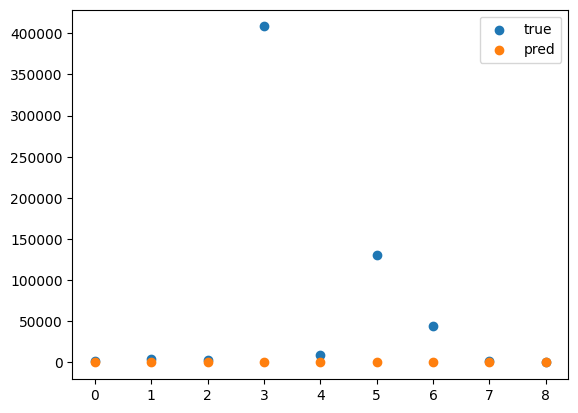

In [119]:
import matplotlib.pyplot as plt

x = range(len(x3_real[0,:]))
plt.scatter(x, x3_real[0,:], label="true")
plt.scatter(x, x3_predict.values[0,:-1], label="pred")
plt.legend()

In [120]:
x3_predict

,y,number_of_person_car_outside,number_of_travels_car_outside,number_of_person_bus_outside,number_of_travels_minibus_inside,number_of_person_bus_inside,number_of_travels_bus_outside,number_of_travels_minibus_outside,covid,y
0,0.849969,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,2.982861e+03
0,2982.860596,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,3.617912e+03
0,3617.911865,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,3.624547e+03
0,3624.546875,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,3.621588e+03
0,3621.588135,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,3.619586e+03
0,3619.586182,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,3.624154e+03
0,3624.153809,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,3.624294e+03
0,3624.293945,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,3.623779e+03
0,3870.000000,4639.000000,4270.000000,822597.000000,9468.000000,208977.00000,47243.00000,2312.000000,0.0,1.026033e+08
0,0.849969,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,2.982861e+03


In [105]:
len(x3_real[0,:])

8

In [104]:
x3_predict

,y,number_of_person_car_outside,number_of_travels_car_outside,number_of_person_bus_outside,number_of_travels_minibus_inside,number_of_person_bus_inside,number_of_travels_bus_outside,number_of_travels_minibus_outside,covid,y
0,0.849969,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,2982.860596
0,2982.860596,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,3617.911865
0,3617.911865,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,3624.546875
0,3624.546875,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,3621.588135
0,3621.588135,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,3619.586182
0,3619.586182,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,3624.153809
0,3624.153809,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,3624.293945
0,3624.293945,1.230042,2.562693,0.609767,0.878491,0.23259,0.55609,4.968807,0.5,3623.778809
